### Finite Element
Darren Lund
01/16/18

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
from matplotlib import pyplot as plt

### Problem 1

In [72]:
def eval_l(i,hs) :
    '''
    Evaluates l(phi_i) for a finite element problem
    '''
    return -1/2*(hs[i-1]+hs[i])

def eval_a(i,j,eps,hs) :
    '''
    Evaluates a(phi_i,phi_j) for a finite element problem
    '''
    res = 0
    if j == i+1 :
        res = eps/hs[i]+1/2
    elif j == i :
        res = -eps/hs[i-1]-eps/hs[i]
    elif j == i-1 :
        res = eps/hs[i]-1/2
    return res

def finite_element(eps,alpha,beta,N) :
    x = np.linspace(0,1,N+1)
    hs = np.diff(x)
    A = np.zeros((len(x),len(x)))
    A[0,0] = 1
    A[-1,-1] = 1
    phi = np.zeros((A.shape[0],1))
    phi[0] = alpha
    phi[-1] = beta
    for i in range(1,A.shape[0]-1) :
        A[i,i] = eval_a(i,i,eps,hs)
        A[i,i+1] = eval_a(i,i-1,eps,hs)
        A[i,i-1] = eval_a(i,i+1,eps,hs)
        phi[i] = eval_l(i,hs)
    coeffs = sla.solve(A,phi)
    y = [coeffs[i,0] if i != 0 else alpha for i in range(len(coeffs)-1)]
    y.append(beta)
    return y

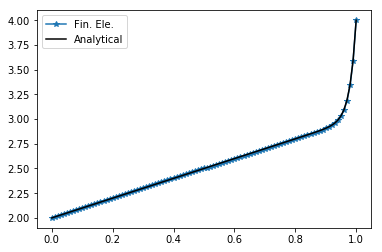

In [73]:
alpha = 2
beta = 4
eps = 0.02
N = 100
x = np.linspace(0,1,N+1)
y = finite_element(eps,alpha,beta,N)
plt.plot(x,y,'*-',label='Fin. Ele.')
ana = lambda x : alpha + x + (beta - alpha - 1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)
y1 = ana(x)
plt.plot(x,y1,'k',label='Analytical')
plt.legend(loc='upper left')
plt.show()

### Problem 2

In [80]:
def finite_element_clust(eps,alpha,beta,N,clustered) :
    x = clustered
    hs = np.diff(x)
    A = np.zeros((len(x),len(x)))
    A[0,0] = 1
    A[-1,-1] = 1
    phi = np.zeros((A.shape[0],1))
    phi[0] = alpha
    phi[-1] = beta
    for i in range(1,A.shape[0]-1) :
        A[i,i] = eval_a(i,i,eps,hs)
        A[i,i+1] = eval_a(i,i-1,eps,hs)
        A[i,i-1] = eval_a(i-1,i,eps,hs)
        phi[i] = eval_l(i,hs)
    coeffs = sla.solve(A,phi)
    y = [coeffs[i,0] if i != 0 else alpha for i in range(len(coeffs)-1)]
    y.append(beta)
    return y

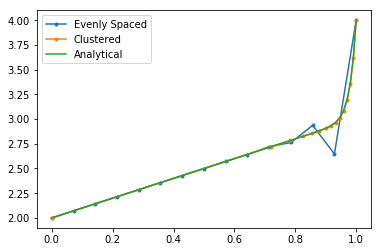

In [81]:
even_grid = np.linspace(0,1,15)
clustered_grid = np.linspace(0,1,15)**(1./8)
clustered_y1 = ana(clustered_grid)
clustered_y = finite_element_clust(eps,alpha,beta,N,clustered_grid)
unclust_y = finite_element_clust(eps,alpha,beta,N,even_grid)
plt.plot(even_grid,unclust_y,'.-',label='Evenly Spaced')
plt.plot(clustered_grid,clustered_y,'.-',label='Clustered')
plt.plot(clustered_grid,clustered_y1,label='Analytical')
plt.legend(loc='upper left')
plt.show()

### Problem 3

In [117]:
def finite_element_banded(eps,alpha,beta,N,clustered) :
    x = clustered
    hs = np.diff(x)
    A_diag = [1] + [eval_a(i,i,eps,hs) for i in range(1,len(x)-1)] + [1]
    A_up = [0,0] + [eval_a(i,i-1,eps,hs) for i in range(1,len(x)-1)]
    A_dow = [eval_a(i-1,i,eps,hs) for i in range(1,len(x)-1)] + [0,0]
    ab = np.vstack((np.vstack((A_up,A_diag)),A_dow))
    phi = [alpha] + [eval_l(i,hs) for i in range(1,len(x)-1)] + [beta]
    coeffs = sla.solve_banded((1,1),ab,phi)
    y = coeffs
    return y

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


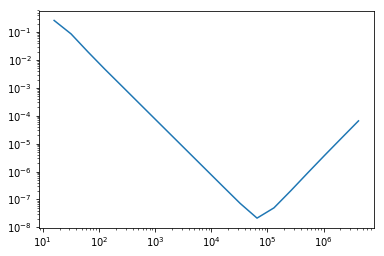

In [119]:
alpha = 2
beta = 4
eps = 0.02
i_vals = np.linspace(4,22,19)
xs = [2**i for i in i_vals]
errors = []
for i in range(len(i_vals)) :
    x = np.linspace(0,1,xs[i]+1)
    y = finite_element_banded(eps,alpha,beta,len(x),x)
    y1 = ana(x)
    errors.append(max([abs(y[j]-y1[j]) for j in range(len(y))]))
plt.loglog(xs,errors,label='Error')
plt.show()